<a href="https://colab.research.google.com/github/mlahmadmostafa/E-commerce-Analytics-Project/blob/main/Capstone_Project_E_commerce_Analytics_Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# 1. Load the dataset
file_path = '/content/drive/MyDrive/data.csv'
try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1')
except FileNotFoundError:
    print("Data Not Found !!!!")

# 2. Handle missing values in CustomerID
data_cleaned = data.copy()
data_cleaned['CustomerID'].fillna('Unknown', inplace=True)  # Fill NA values

# Convert CustomerID to string
data_cleaned['CustomerID'] = data_cleaned['CustomerID'].astype('string')

# 3. Convert InvoiceDate to datetime type
if 'InvoiceDate' in data_cleaned.columns:
    data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'], errors='coerce')

# 4. Remove rows with negative Quantity or UnitPrice
if 'Quantity' in data_cleaned.columns and 'UnitPrice' in data_cleaned.columns:
    data_cleaned = data_cleaned[(data_cleaned['Quantity'] >= 0) & (data_cleaned['UnitPrice'] >= 0)]

# 5. Create a TotalPrice column
if 'Quantity' in data_cleaned.columns and 'UnitPrice' in data_cleaned.columns:
    data_cleaned['TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

# Save the cleaned data
output_path = 'cleaned_data.csv'
data_cleaned.to_csv(output_path, index=False)

data_cleaned.head()


<ipython-input-3-7c3f00e3854b>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['CustomerID'].fillna('Unknown', inplace=True)  # Fill NA values
<ipython-input-3-7c3f00e3854b>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_cleaned['CustomerID'].fillna('Unknown', inplace=True)  # Fill NA values
<ipython-input-3-7c3f00e3854b>:27

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Exploratory Data Analysis (EDA)

In [32]:
# 1. Perform a statistical summary of the dataset
stat_summary = data_cleaned.describe()

print("Statistical Summary:\n", stat_summary)

Statistical Summary:
             Quantity                    InvoiceDate      UnitPrice  \
count  531283.000000                         531283  531283.000000   
mean       10.655299  2011-07-04 18:15:33.177910016       3.898954   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         1.000000            2011-03-28 11:59:00       1.250000   
50%         3.000000            2011-07-20 12:01:00       2.080000   
75%        10.000000            2011-10-19 12:35:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   13541.330000   
std       156.830617                            NaN      35.876279   

          TotalPrice  
count  531283.000000  
mean       20.077218  
min         0.000000  
25%         3.750000  
50%         9.900000  
75%        17.700000  
max    168469.600000  
std       270.058254  


In [33]:
# 2. Identify the top 10 selling products by Quantity
top_selling_products = data_cleaned.groupby('StockCode')['Quantity'].sum().nlargest(10)

print("\nTop 10 Selling Products by Quantity:\n", top_selling_products)



Top 10 Selling Products by Quantity:
 StockCode
23843     80995
23166     78033
22197     56921
84077     55047
85099B    48478
85123A    41664
84879     36461
21212     36419
23084     31722
22492     26633
Name: Quantity, dtype: int64


In [34]:
# 3. Calculate total revenue and number of transactions
total_revenue = data_cleaned['TotalPrice'].sum()
number_of_transactions = data_cleaned['InvoiceNo'].nunique()

print(f"\nTotal Revenue: {total_revenue}")
print(f"Number of Transactions: {number_of_transactions}")



Total Revenue: 10666684.543999996
Number of Transactions: 20726


In [35]:
# 4. Check the data types of each column
column_data_types = data_cleaned.dtypes

print("\nData Types of Each Column:\n", column_data_types)



Data Types of Each Column:
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID     string[python]
Country                object
TotalPrice            float64
dtype: object


# Time Series Analysis

In [8]:
data_cleaned['Date'] = pd.to_datetime(data_cleaned['InvoiceDate'])

monthly_sales = data_cleaned.groupby(data_cleaned['Date'].dt.to_period('M'))['TotalPrice'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
monthly_sales.head()

,TotalPrice
Date,
2010-12-01,823746.140
2011-01-01,691364.560
2011-02-01,523631.890
2011-03-01,717639.360
2011-04-01,537808.621


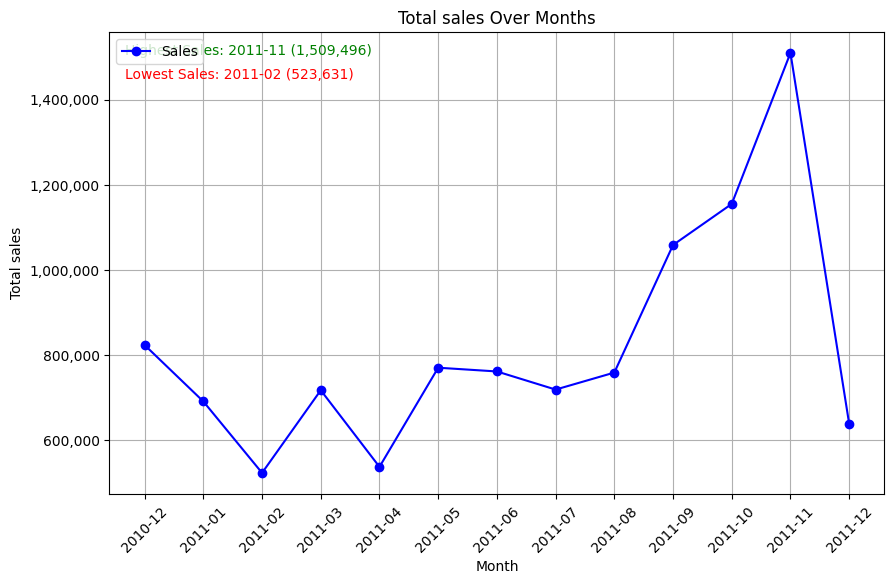

In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.strftime('%Y-%m'), monthly_sales.values , marker='o', linestyle='-', color='b', label='Sales')

max_month = monthly_sales.idxmax()
min_month = monthly_sales.idxmin()

plt.annotate(f"Highest Sales: {max_month.strftime('%Y-%m')} ({int(monthly_sales[max_month]):,})",
             xy=(0.02, 0.95), xycoords='axes fraction', fontsize=10, color='green')

plt.annotate(f"Lowest Sales: {min_month.strftime('%Y-%m')} ({int(monthly_sales[min_month]):,})",
             xy=(0.02, 0.90), xycoords='axes fraction', fontsize=10, color='red')

plt.xlabel('Month')
plt.ylabel('Total sales')
plt.title('Total sales Over Months')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

# RFM Analysis (Customer Segmentation)

In [39]:
# Define a reference date to calculate Recency
# Using the maximum InvoiceDate in the dataset and adding 1 day to ensure the calculation of the days since the last purchase is accurate

analysis_date = data_cleaned['InvoiceDate'].max() + pd.DateOffset(days=1)

# Calculate RFM metrics for each customer
rfm = data_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,# Recency: Calculate days since the last purchase
    'InvoiceNo': 'nunique',                                 # Frequency: Count the number of unique invoices (purchases)
    'TotalPrice': 'sum'                                     # Monetary: Sum up the total price spent by the customer
}).reset_index()

# Rename columns for clarity
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

print(rfm)

     CustomerID  Recency  Frequency    Monetary
0       12346.0      326          1    77183.60
1       12347.0        2          7     4310.00
2       12348.0       75          4     1797.24
3       12349.0       19          1     1757.55
4       12350.0      310          1      334.40
...         ...      ...        ...         ...
4335    18281.0      181          1       80.82
4336    18282.0        8          2      178.05
4337    18283.0        4         16     2094.88
4338    18287.0       43          3     1837.28
4339    Unknown        1       2190  1755276.64

[4340 rows x 4 columns]


In [40]:
# Define quantile-based thresholds for all three RFM metrics
quantiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([0.33, 0.66]).to_dict()

def segment_customer(row):
    # Recency segmentation: lower recency is better (closer purchases)
    if row['Recency'] <= quantiles['Recency'][0.33]:
        recency_score = 'High'
    elif row['Recency'] <= quantiles['Recency'][0.66]:
        recency_score = 'Medium'
    else:
        recency_score = 'Low'

    # Frequency segmentation: higher frequency is better
    if row['Frequency'] >= quantiles['Frequency'][0.66]:
        frequency_score = 'High'
    elif row['Frequency'] >= quantiles['Frequency'][0.33]:
        frequency_score = 'Medium'
    else:
        frequency_score = 'Low'

    # Monetary segmentation: higher monetary is better
    if row['Monetary'] >= quantiles['Monetary'][0.66]:
        monetary_score = 'High'
    elif row['Monetary'] >= quantiles['Monetary'][0.33]:
        monetary_score = 'Medium'
    else:
        monetary_score = 'Low'

    # Combine scores into a single segment
    if recency_score == 'High' and frequency_score == 'High' and monetary_score == 'High':
        return 'High'
    elif (
        (recency_score == 'Medium' and frequency_score in ['High', 'Medium'] and monetary_score in ['High', 'Medium']) or
        (frequency_score == 'Medium' and recency_score in ['High', 'Medium'] and monetary_score in ['High', 'Medium']) or
        (monetary_score == 'Medium' and recency_score in ['High', 'Medium'] and frequency_score in ['High', 'Medium'])
    ):
        return 'Medium'
    else:
        return 'Low'

# Apply the updated segmentation
rfm['Segment'] = rfm.apply(segment_customer, axis=1)


<ipython-input-41-35c76a959f05>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', palette='viridis', order=segment_order)
<ipython-input-41-35c76a959f05>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', palette='viridis')


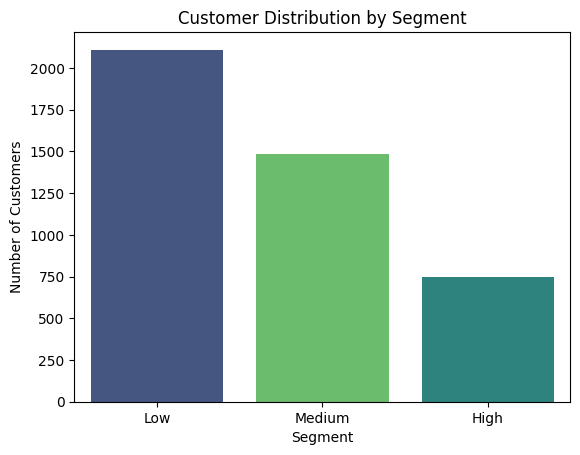

In [41]:
# Define the desired order of segments
segment_order = ['Low', 'Medium', 'High']

# Plot the distribution with sorted segments
sns.countplot(data=rfm, x='Segment', palette='viridis', order=segment_order)

# Plot the distribution
sns.countplot(data=rfm, x='Segment', palette='viridis')
plt.title('Customer Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

# Product Category Analysis

So, to extract category from description column we can either:

1 - Extract the last 2 words from the description column and use them as category

2 - Over kill it with an LLM

The first approach is much faster but less precise, Though I would recommend it as it is less costly

In [100]:
import re

# Cleaning Description and removing extra spaces, more refined for better category extraction
def clean_text(text):
    # Return 'unknown' if the description is 'unknown'
    if text.strip().lower() == "unknown":
        return "unknown"
    # Cleaning text from non-alphabet words
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Using last 2 words as category, this part is for refinement
    return " ".join(text.split()[-2:]).lower()

# Ensure 'Description' column has no NaN values and is normalized
data_cleaned["Description"] = data_cleaned["Description"].fillna("unknown").astype(str)

# Apply the clean_text function to create the Categories column
data_cleaned["Categories"] = data_cleaned["Description"].apply(clean_text)


In [101]:
# Counting unique Categories
len(data_cleaned["Categories"].unique())

2390

In [102]:
print(data_cleaned[["Description", "Categories"]].head())


                           Description     Categories
0   WHITE HANGING HEART T-LIGHT HOLDER  tlight holder
1                  WHITE METAL LANTERN  metal lantern
2       CREAM CUPID HEARTS COAT HANGER    coat hanger
3  KNITTED UNION FLAG HOT WATER BOTTLE   water bottle
4       RED WOOLLY HOTTIE WHITE HEART.    white heart


In [73]:
# creating an aggregation for Total price of categories
# ordering from largest revenue to smallest
df_Cat_total_price = data_cleaned[['Categories', 'TotalPrice']].groupby('Categories').sum().sort_values(by='TotalPrice', ascending=False)
df_Cat_total_price.head()

,TotalPrice
Categories,
tlight holder,251340.10
dotcom postage,206248.77
metal sign,198111.84
red retrospot,187192.23
cakestand tier,184181.99


In [105]:
# Calculating total sales and revenue by category
df_Cat_total_price_sales = data_cleaned[['Categories', 'TotalPrice', 'Quantity']].groupby('Categories').agg(
    {'TotalPrice': 'sum', 'Quantity': 'sum'}
).sort_values(by='TotalPrice', ascending=False)
df_Cat_total_price_sales.head()

,TotalPrice,Quantity
Categories,,
tlight holder,251340.10,146220
dotcom postage,206248.77,708
metal sign,198111.84,104709
red retrospot,187192.23,97254
cakestand tier,184181.99,14849


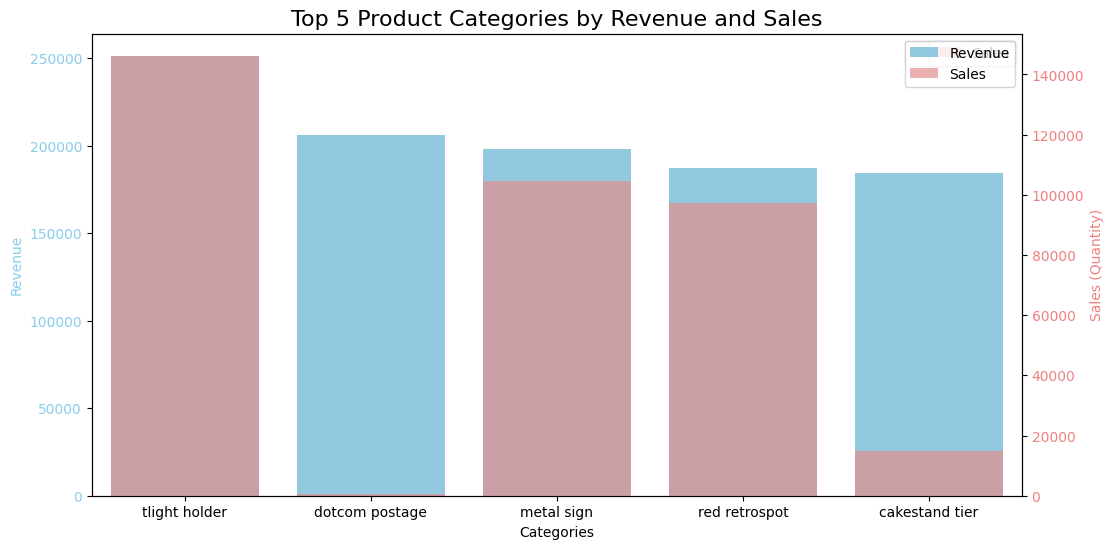

In [106]:
# Selecting top 5 categories by revenue
df_Cat_total_price_top_5 = df_Cat_total_price_sales.head(5).reset_index()

# Creating the bar plot for top 5 categories
fig, ax1 = plt.subplots(figsize=(12, 6))  # Larger figure size for better readability

# Bar plot for revenue (TotalPrice)
sns.barplot(x='Categories', y='TotalPrice', data=df_Cat_total_price_top_5, ax=ax1, color='skyblue', label='Revenue')
ax1.set_ylabel('Revenue', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Creating a second y-axis for sales (Quantity)
ax2 = ax1.twinx()
sns.barplot(x='Categories', y='Quantity', data=df_Cat_total_price_top_5, ax=ax2, color='lightcoral', alpha=0.7, label='Sales')
ax2.set_ylabel('Sales (Quantity)', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')

# Adding title and legend
plt.title('Top 5 Product Categories by Revenue and Sales', fontsize=16)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)  # Adjust legend position

plt.show()

<ipython-input-74-0ebe6c21ac16>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Categories',


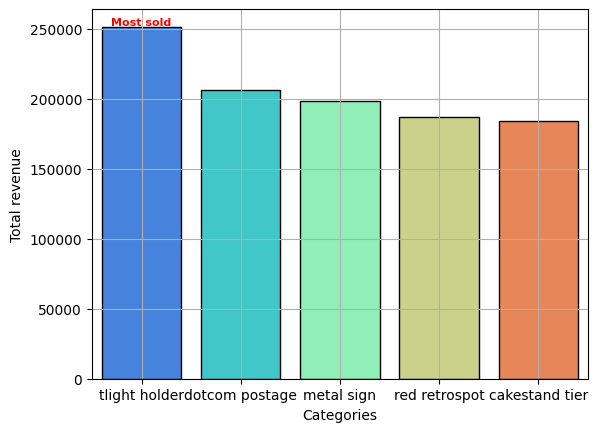

In [74]:
# only keeping top 5 categories, could use .head() too
df_Cat_total_price_top_5 = df_Cat_total_price.iloc[:5].reset_index()
# The bar plot for top 5 categories of revenue
ax = sns.barplot(x='Categories',
            y='TotalPrice',
            data=df_Cat_total_price_top_5,
            palette='rainbow',
            edgecolor='black')
# Changing the label to be more readable
plt.ylabel("Total revenue")

# Adding annotation for top sold
top_bar_index = df_Cat_total_price_top_5['TotalPrice'].idxmax()
top_bar_value = df_Cat_total_price_top_5['TotalPrice'].max()
ax.text(
    top_bar_index,
    top_bar_value + 5,
    'Most sold',
    ha='center',
    va='bottom',
    fontsize=8,
    color='red',
    fontweight='bold',
)
plt.grid()

<ipython-input-75-0174c97e945e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Categories',


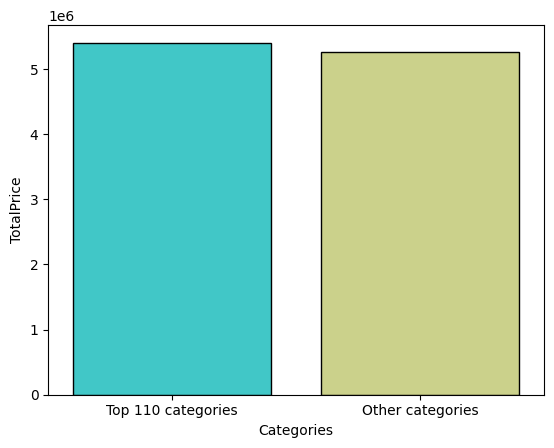

In [75]:
threshhold = 110
top_n = df_Cat_total_price.iloc[:threshhold].sum().values[0]
other = df_Cat_total_price.iloc[threshhold:].sum().values[0]
df_top_n_vs_other = pd.DataFrame([["Top 110 categories",top_n],["Other categories",other]],columns = ['Categories','TotalPrice'])
ax = sns.barplot(x='Categories',
            y='TotalPrice',
            data=df_top_n_vs_other,
            palette='rainbow',
            edgecolor='black')

From the last plot we conclude that only top 110 categories have revenue as much as the rest of the 2273 categories
Showcasing the second approach
This approach has to be finetuned first

In [48]:
from transformers import pipeline

generator = pipeline("text-generation", model="EleutherAI/gpt-neo-125M") # Creating Model instance


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/526M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

Device set to use cpu


In [66]:
from time import time
import logging
logging.getLogger('transformers').setLevel(logging.ERROR) # To remove unnecessary loggings

start = time() # Calculating time
# Extracting Categories from Description text using LLM
for desc in data_cleaned['Description'][:5]:
    prompt = f"This product description: '{desc}' belongs to the category:"
    result = generator(prompt, max_length=30, num_return_sequences=1)
    output = f"{result[0]['generated_text'].split(':')[-1].strip()}"
    print(f"{desc} -> {output}")
print("Time elapsed",(time()-start), 'seconds') # Printing time elapsed

WHITE HANGING HEART T-LIGHT HOLDER -> 'Hair Healing Hair'
WHITE METAL LANTERN -> 'The World's Most Beautiful Metal Layers' and is available
CREAM CUPID HEARTS COAT HANGER -> 'CREAM CUPID
KNITTED UNION FLAG HOT WATER BOTTLE -> 'Korean Water Bottles
RED WOOLLY HOTTIE WHITE HEART. -> 'Red WOOLLY HOTT
Time elapsed 3.2012434005737305 seconds


In [67]:
((len(data_cleaned)/5)/60)/60 # Calculating time to figure out the whole dataset

29.515722222222223

That means that it would take the model 22 hours to classify the entire dataset on my machine.
Smaller models could be useful with finetuning, but this was a showcase of what I think is the right way to do it.

# Geographical Analysis

In [76]:
total_revenue_by_country=data_cleaned.groupby('Country')['TotalPrice'].sum()
print(total_revenue_by_country)

Country
Australia                138521.310
Austria                   10198.680
Bahrain                     754.140
Belgium                   41196.340
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20450.440
Cyprus                    13590.380
Czech Republic              826.740
Denmark                   18955.340
EIRE                     283453.960
European Community         1300.250
Finland                   22546.080
France                   209715.110
Germany                  228867.140
Greece                     4760.520
Hong Kong                 15691.800
Iceland                    4310.000
Israel                     8135.260
Italy                     17483.240
Japan                     37416.370
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2725.590
Netherlands              285446.340
Norway                    36165.440
Poland                     7334.650
Portugal            

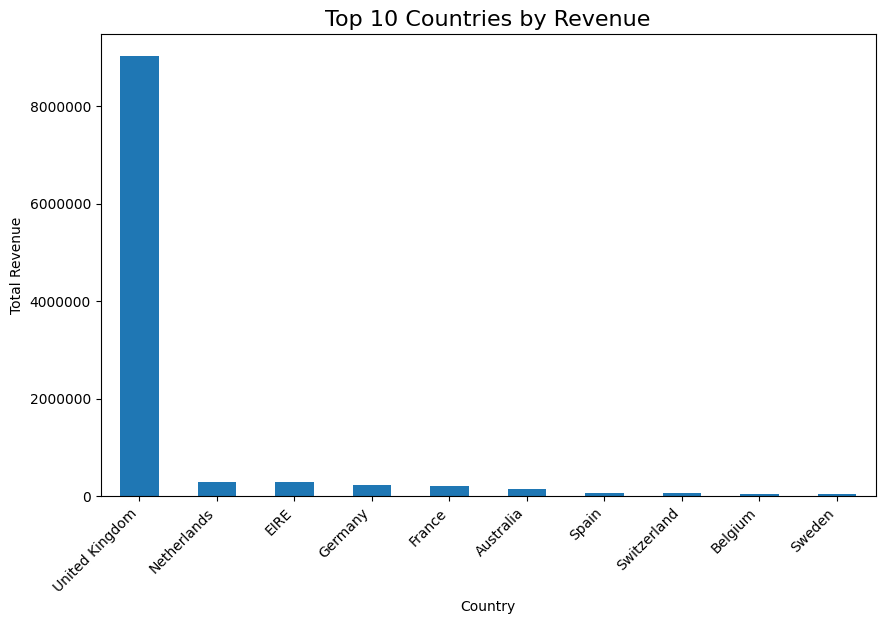

In [77]:
top_10_countries = total_revenue_by_country.sort_values(ascending=False).head(10)
# Create a bar plot
top_10_countries.plot(kind='bar', figsize=(10, 6))

#disable scientific notation for the y-axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

# Add title
plt.title('Top 10 Countries by Revenue', fontsize=16)

# Set axis labels
plt.xlabel('Country')
plt.ylabel('Total Revenue')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


It looks like there is a significant revenue difference between the United Kingdom and the other countries in your dataset. The United Kingdom's revenue is much higher than all the others, which is distorting the plot and making it hard to visualize the revenue distribution for the smaller countries effectively.

Possible Solutions to Handle this:

1. Logarithmic Scale for the Plot:
One way to address this issue is to plot the revenue on a logarithmic scale. A logarithmic scale compresses the large values and makes the differences between the smaller values more visible. It’s a common approach when there's a wide range of values in the data.

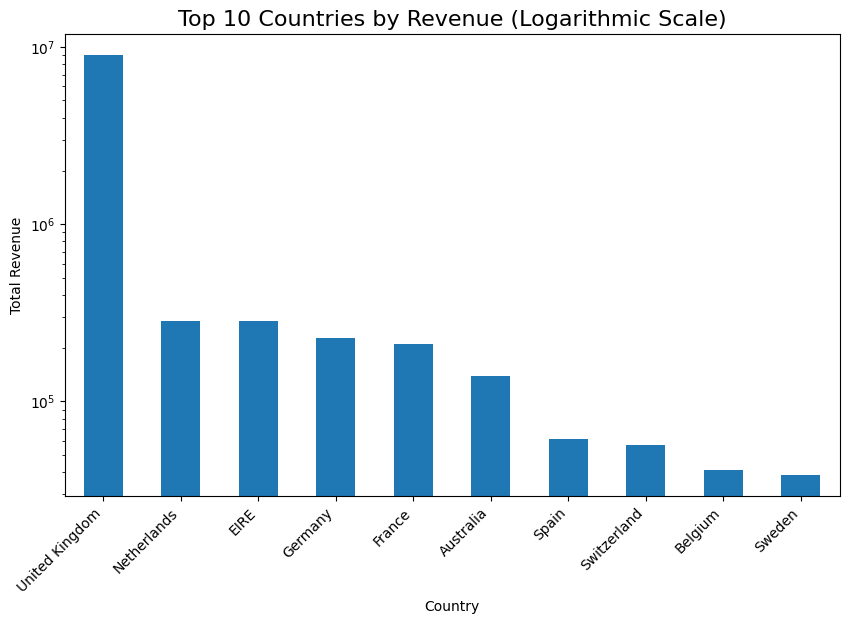

In [78]:
top_10_countries = total_revenue_by_country.sort_values(ascending=False).head(10)

# Create the bar plot
top_10_countries.plot(kind='bar' , figsize=(10, 6), logy=True)

# Set axis labels
plt.xlabel('Country')
plt.ylabel('Total Revenue')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Add title
plt.title('Top 10 Countries by Revenue (Logarithmic Scale)', fontsize=16)

# Show the plot
plt.show()



2. Excluding the Outlier (UK):

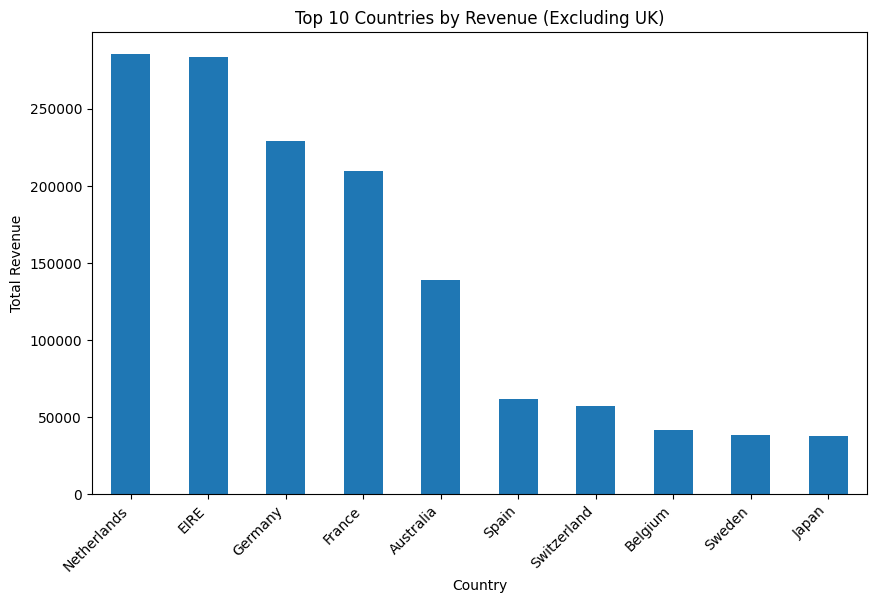

In [79]:
top_10_countries_excluding_uk = total_revenue_by_country[total_revenue_by_country.index != 'United Kingdom'].sort_values(ascending=False).head(10)

# Create a bar plot
top_10_countries_excluding_uk.plot(kind='bar', figsize=(10, 6))

#disable scientific notation for the y-axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

# Add title
plt.title('Top 10 Countries by Revenue (Excluding UK)')

# Set axis labels
plt.xlabel('Country')
plt.ylabel('Total Revenue')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


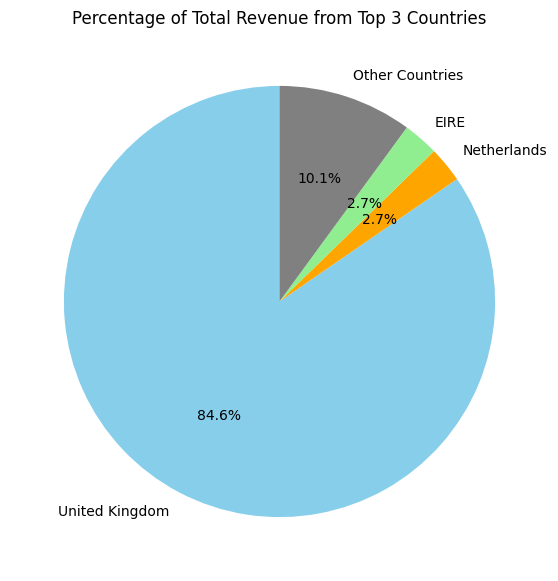

In [80]:
# Calculate the total revenue for all countries
total_revenue_all_countries = total_revenue_by_country.sum()

# Calculate the total revenue for the top 3 countries
top_3_countries = total_revenue_by_country.sort_values(ascending=False).head(3)
total_revenue_top_3 = top_3_countries.sum()

# Calculate the percentage of total revenue from the top 3 countries
percentage_top_3 = (total_revenue_top_3 / total_revenue_all_countries) * 100

# Data for plotting
other_countries_revenue = total_revenue_all_countries - total_revenue_top_3
labels = list(top_3_countries.index) + ['Other Countries']
revenues = list(top_3_countries) + [other_countries_revenue]

# Plot the percentage using a pie chart
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(revenues, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'lightgreen', 'gray'])

# Add title
ax.set_title('Percentage of Total Revenue from Top 3 Countries')

# Display the plot
plt.show()

# Customer Behavior Analysis

Plot the distribution of order quantities


In [81]:
# Check the frequency distribution of values in the 'Quantity' column
data_cleaned['Quantity'].value_counts

<bound method IndexOpsMixin.value_counts of 0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 531283, dtype: int64>

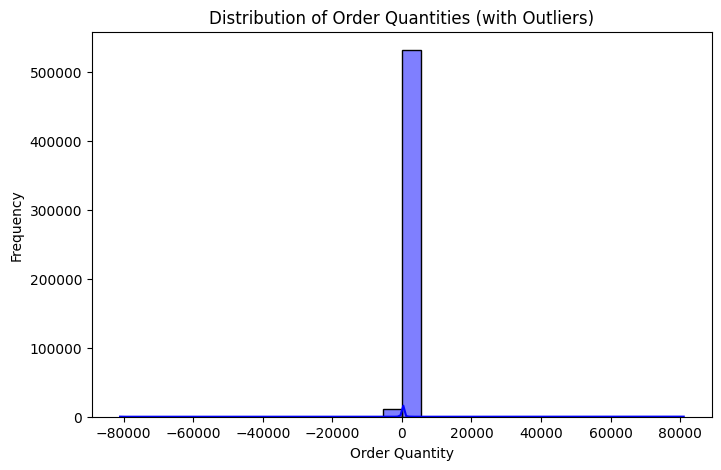

In [82]:
# Plot the distribution of order quantities (including outliers) using a histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(8, 5))  # Set the figure size
sns.histplot(data['Quantity'], bins=30, kde=True, color='blue')  # Create the histogram with KDE overlay
plt.title('Distribution of Order Quantities (with Outliers)')  # Set the title of the plot
plt.xlabel('Order Quantity')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.show()  # Display the plot

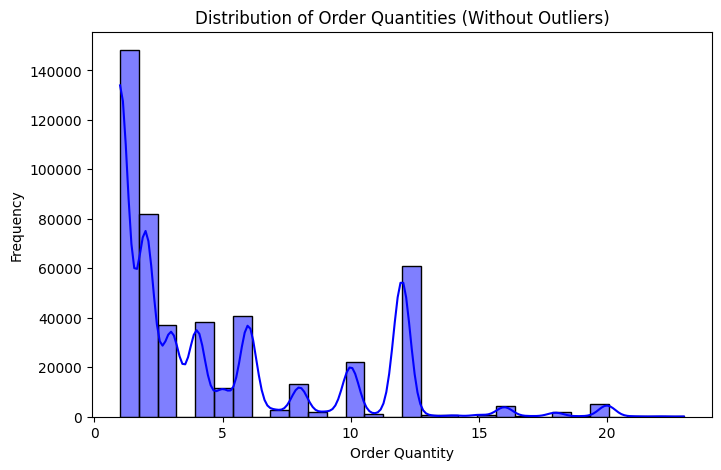

In [83]:
# Calculate the first (Q1) and third (Q3) quartiles of the 'Quantity' column
Q1 = data_cleaned['Quantity'].quantile(0.25)
Q3 = data_cleaned['Quantity'].quantile(0.75)
# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Filter out rows that are considered outliers based on the IQR method
filtered_data = data_cleaned[(data_cleaned['Quantity'] >= Q1 - 1.5 * IQR) & (data_cleaned['Quantity'] <= Q3 + 1.5 * IQR)]

# Plot the distribution of order quantities (without outliers) using a histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(8, 5))  # Set the figure size
sns.histplot(filtered_data['Quantity'], bins=30, kde=True, color='blue')  # Create the histogram with KDE overlay
plt.title('Distribution of Order Quantities (Without Outliers)')  # Set the title of the plot
plt.xlabel('Order Quantity')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.show()  # Display the plot

Scatter Plot of Quantity vs. TotalPrice


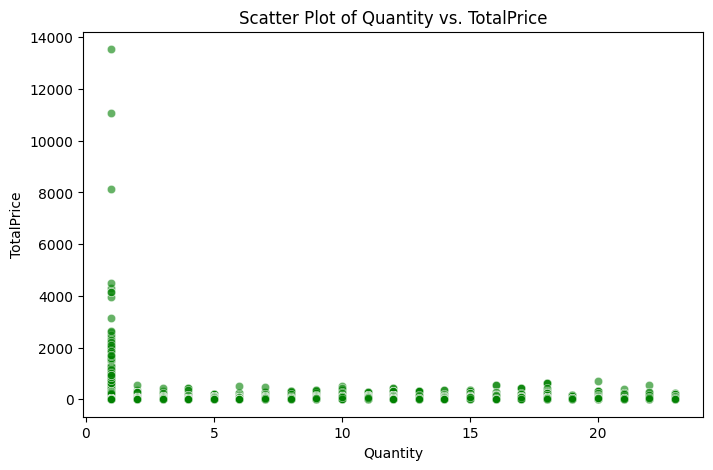

In [84]:
# Plot a scatter plot of 'Quantity' vs. 'TotalPrice' for the filtered data (with outliers)
plt.figure(figsize=(8, 5))  # Set the figure size
sns.scatterplot(data=filtered_data, x='Quantity', y='TotalPrice', alpha=0.6, color='green')  # Create the scatter plot
plt.title('Scatter Plot of Quantity vs. TotalPrice')  # Set the title of the plot
plt.xlabel('Quantity')  # Label the x-axis
plt.ylabel('TotalPrice')  # Label the y-axis
plt.show()  # Display the plot

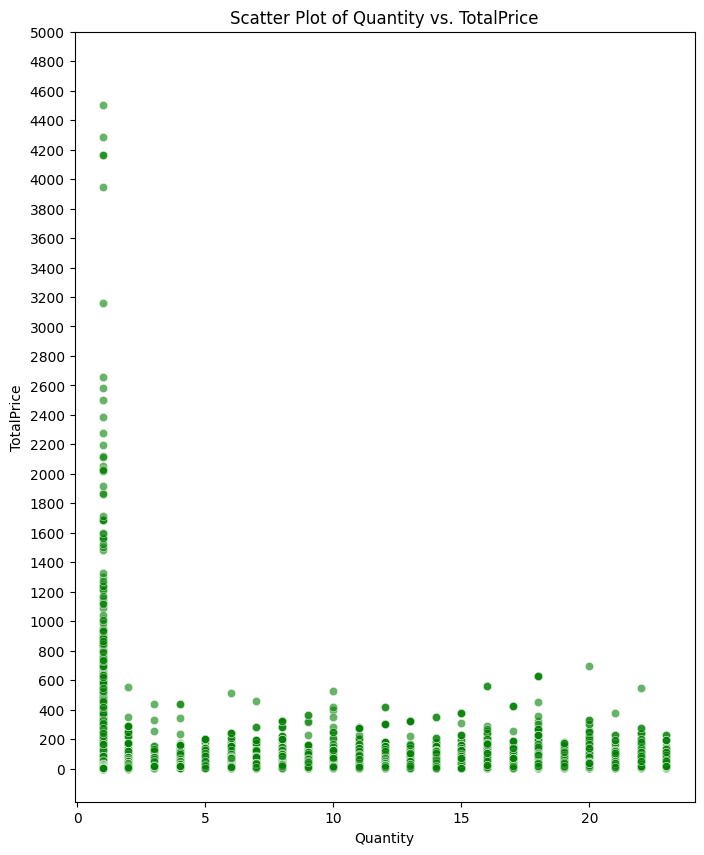

In [86]:
import numpy as np
# Filter the data further to exclude 'TotalPrice' values that are greater than 5000 or less than 0
filtered_data_price = filtered_data[(filtered_data['TotalPrice'] < 5000) & (filtered_data['TotalPrice'] > 0)]

# Plot a scatter plot of 'Quantity' vs. 'TotalPrice' for the further filtered data
plt.figure(figsize=(8, 10))  # Set the figure size
sns.scatterplot(data=filtered_data_price, x='Quantity', y='TotalPrice', alpha=0.6, color='green')  # Create the scatter plot
y_ticks = np.arange(0, 5000 + 200, 200)  # Set the y-axis ticks from 0 to 5000 with 200 steps
plt.yticks(y_ticks)  # Apply the y-axis ticks
plt.title('Scatter Plot of Quantity vs. TotalPrice')  # Set the title of the plot
plt.xlabel('Quantity')  # Label the x-axis
plt.ylabel('TotalPrice')  # Label the y-axis
plt.show()  # Display the plot

Average Daily Sales Throughout the Week


<ipython-input-87-79e52472cbdc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales.index, y=avg_sales.values, palette='viridis')  # Create the bar plot


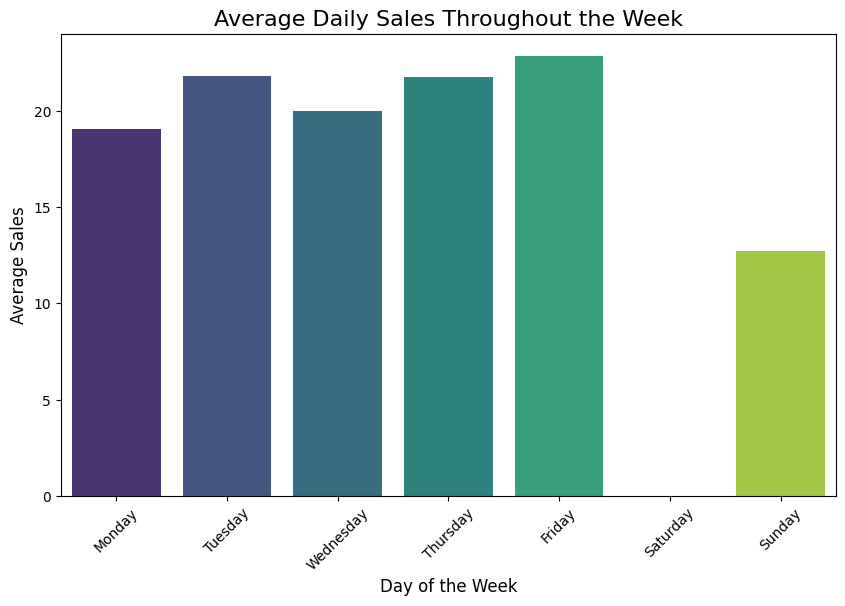

In [87]:
# Extract the day of the week from the 'InvoiceDate' column and add it as a new column
data_cleaned['DayOfWeek'] = data_cleaned['InvoiceDate'].dt.day_name()

# Calculate the average total sales for each day of the week, ordered from Monday to Sunday
avg_sales = data_cleaned.groupby('DayOfWeek')['TotalPrice'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot the average sales for each day of the week using a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=avg_sales.index, y=avg_sales.values, palette='viridis')  # Create the bar plot
plt.title('Average Daily Sales Throughout the Week', fontsize=16)  # Set the title of the plot
plt.xlabel('Day of the Week', fontsize=12)  # Label the x-axis
plt.ylabel('Average Sales', fontsize=12)  # Label the y-axis
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)  # Set the font size for the y-axis ticks
plt.show()  # Display the plot

# Moving Average Forecast

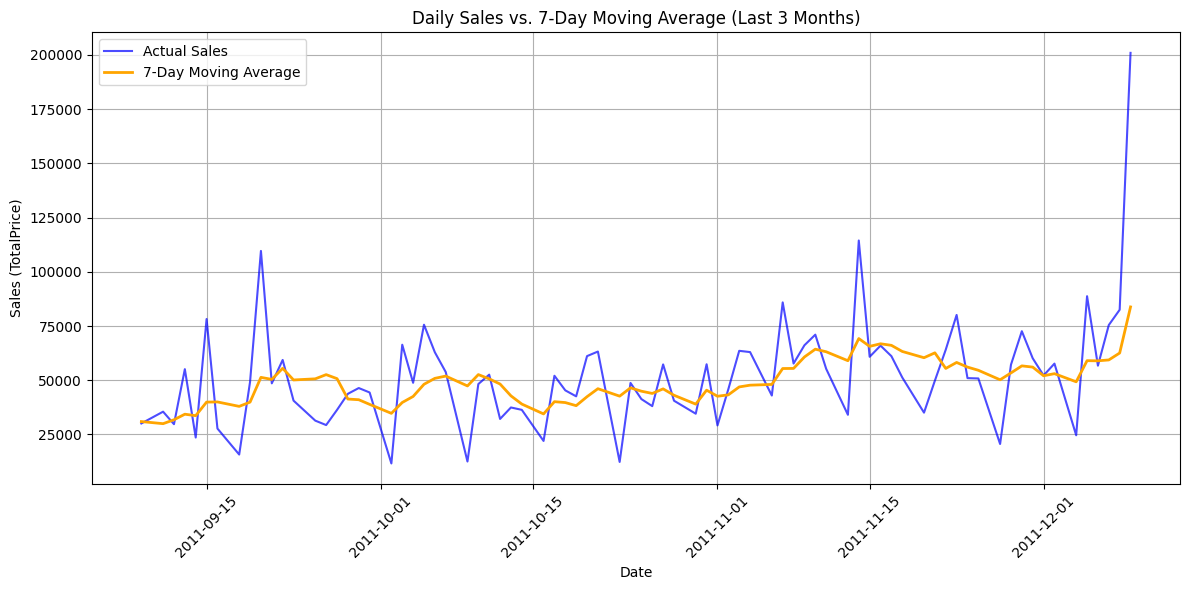

In [11]:
daily_sales = data_cleaned.groupby(data_cleaned['InvoiceDate'].dt.date)['TotalPrice'].sum()
daily_sales.index = pd.to_datetime(daily_sales.index)
daily_sales_ma = daily_sales.rolling(window=7).mean()

last_three_months = daily_sales.index.max() - pd.DateOffset(months=3)
daily_sales_filtered = daily_sales[daily_sales.index >= last_three_months]
daily_sales_ma_filtered = daily_sales_ma[daily_sales_ma.index >= last_three_months]

plt.figure(figsize=(12, 6))
plt.plot(daily_sales_filtered.index, daily_sales_filtered.values, label='Actual Sales', color='blue', alpha=0.7)
plt.plot(daily_sales_ma_filtered.index, daily_sales_ma_filtered.values, label='7-Day Moving Average', color='orange', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Sales (TotalPrice)')
plt.title('Daily Sales vs. 7-Day Moving Average (Last 3 Months)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

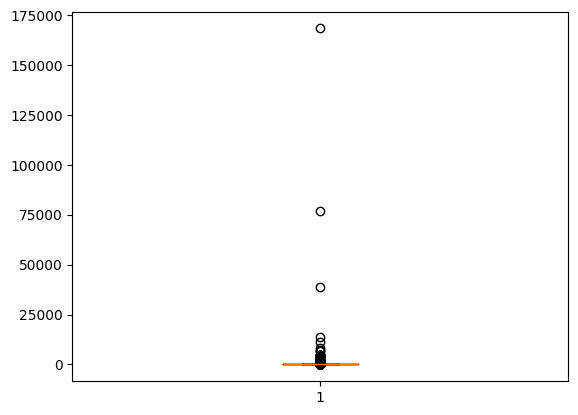

In [12]:
# Detecting the Outlier

plt.boxplot(data_cleaned['TotalPrice'])
plt.show()

# Summary Dashboard Creation

# Optimize Data Processing


So, I will try to calculate z-score for TotalPrice with:

1 - Loops

2 - vectorization

3 - Apply method

In [90]:
def calculate_zscore(data_cleaned):
    # Calculate z-score using a loop
    mean = np.mean(data_cleaned['TotalPrice'])
    std_dev = np.std(data_cleaned['TotalPrice'])
    for index in data_cleaned.index:
        data_cleaned.loc[index, 'Standarized TotalPrice'] = (data_cleaned.loc[index, 'TotalPrice'] - mean) / std_dev
    return data_cleaned

def calculate_zscore_vec(data_cleaned):
    # Calculate z-score using vectorization
    mean = np.mean(data_cleaned['TotalPrice'])
    std_dev = np.std(data_cleaned['TotalPrice'])
    data_cleaned['Standarized TotalPrice'] = (data_cleaned['TotalPrice'] - mean) / std_dev
    return data_cleaned

def calculate_zscore_apply(data_cleaned):
    # Calculate z-score using apply method
    mean = np.mean(data_cleaned['TotalPrice'])
    std_dev = np.std(data_cleaned['TotalPrice'])

    def standarize(num):
        return (num - mean) / std_dev

    data_cleaned['Standarized TotalPrice'] = data_cleaned['TotalPrice'].apply(standarize)
    return data_cleaned


In [96]:
import timeit

# Benchmarking the loop implementation
loop_time = timeit.timeit(
    lambda: calculate_zscore(data_cleaned.copy()), number=5
)

In [93]:
# Benchmarking the vectorized implementation
vec_time = timeit.timeit(
    lambda: calculate_zscore_vec(data_cleaned.copy()), number=5
)


In [94]:
# Benchmarking the apply method implementation
apply_time = timeit.timeit(
    lambda: calculate_zscore_apply(data_cleaned.copy()), number=5
)

In [98]:
# Compare and report performance differences
print(f"Loop implementation time: {loop_time:.6f} seconds")
print(f"Vectorized implementation time: {vec_time:.6f} seconds")
print(f"Apply method implementation time: {apply_time:.6f} seconds")

Loop implementation time: 905.891521 seconds
Vectorized implementation time: 1.022326 seconds
Apply method implementation time: 2.361159 seconds


<ipython-input-99-362428ef2b46>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Time', data=df, palette=['red', 'blue', 'green'], edgecolor='black')
<ipython-input-99-362428ef2b46>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Time', data=df, palette=['red', 'blue', 'green'], edgecolor='black')


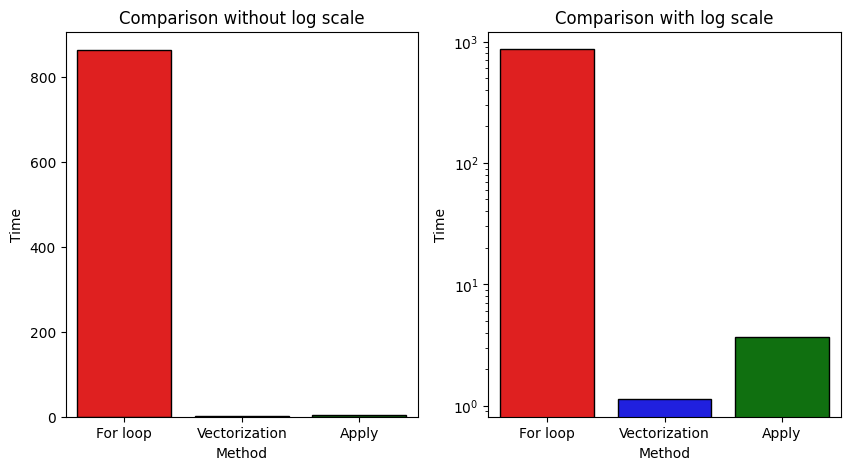

In [99]:
# Benchmarking and storing times in a list
times = []
for method, func in [
    ("For loop", calculate_zscore),
    ("Vectorization", calculate_zscore_vec),
    ("Apply", calculate_zscore_apply),
]:
    time = timeit.timeit(lambda: func(data_cleaned.copy()), number=5)
    times.append([method, time])

# Creating the DataFrame for plotting
df = pd.DataFrame(times, columns=["Method", "Time"])

# Plotting the comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Method', y='Time', data=df, palette=['red', 'blue', 'green'], edgecolor='black')
plt.title("Comparison without log scale")
plt.subplot(1, 2, 2)
sns.barplot(x='Method', y='Time', data=df, palette=['red', 'blue', 'green'], edgecolor='black')
plt.title("Comparison with log scale")
plt.yscale("log")
plt.show()